In [1]:
import pandas as pd
import seaborn as sns

In [2]:
zs_c = (
    pd.read_csv("./../data/zero_shot_instruct_model.csv")
    .assign(experiment="Zero-shot (Chat)")
    .loc[:, ["experiment", "label", "response"]]
).rename(columns={"response": "pred"})
zs_b = (
    pd.read_csv("./../data/zero_shot_base_model.csv")
    .assign(experiment="Zero-shot (Base)")
    .loc[:, ["experiment", "label", "response"]]
    .rename(columns={"response": "pred"})
)
fs_b = (
    pd.read_csv("./../data/few_shot_instruct_model.csv")
    .assign(experiment="Few-shot")
    .loc[:, ["experiment", "label", "response"]]
).rename(columns={"response": "pred"})
icm = (
    pd.read_csv("./../data/labelled_dataset.csv", index_col="id")
    .assign(experiment="ICM")
    .loc[:, ["experiment", "label", "pred"]]
)
df = pd.concat([zs_c, zs_b, fs_b, icm]).reset_index(drop=True)

In [3]:
df = df.assign(
    acc=lambda df: (df["label"].replace({0: False, 1: True}) == df["pred"]) * 100
)

/var/folders/9d/qnh66b_96jq1whwx64rh7yq40000gn/T/ipykernel_55154/2891059118.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  acc=lambda df: (df["label"].replace({0: False, 1: True}) == df["pred"]) * 100


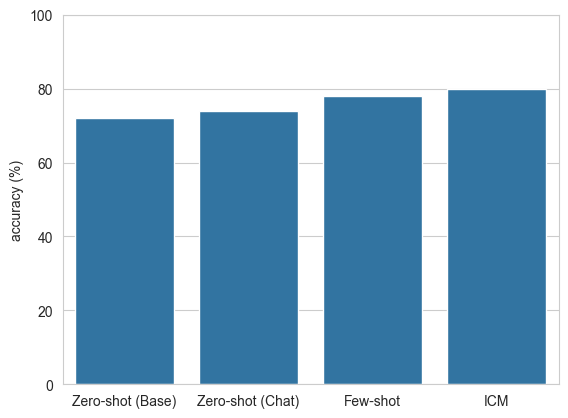

In [4]:
sns.set_style("whitegrid")

ax = sns.barplot(
    df,
    x="experiment",
    y="acc",
    errorbar=None,
    order=["Zero-shot (Base)", "Zero-shot (Chat)", "Few-shot", "ICM"],
)
ax.set_ylabel("accuracy (%)")
ax.set_xlabel("")
ax.set_ylim(0, 100);
fig = ax.get_figure()
fig.savefig("./../data/results.png") 